<a href="https://colab.research.google.com/github/codewithpiyushh/Machine-learning-/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMPLE LINEAR REGRESSION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
X = 6* np.random.rand(200,1) -3
y =  0.8 * X**2+0.9*X+2+np.random.rand(200,1)


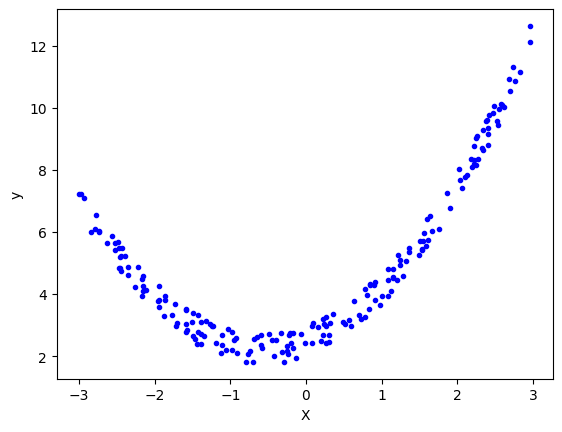

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size =0.2)


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.44828418621570765

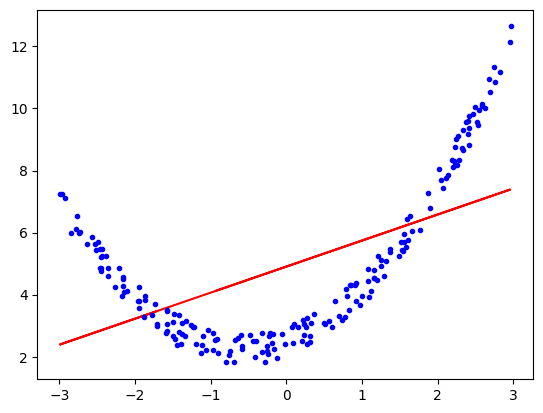

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_trans=poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
 lr=LinearRegression()

In [ ]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.9890248438316603

In [ ]:
print(lr.intercept_)

[2.51913702]


In [ ]:
print(lr.coef_)

[[0.         0.87277119 0.80224349]]


In [ ]:
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

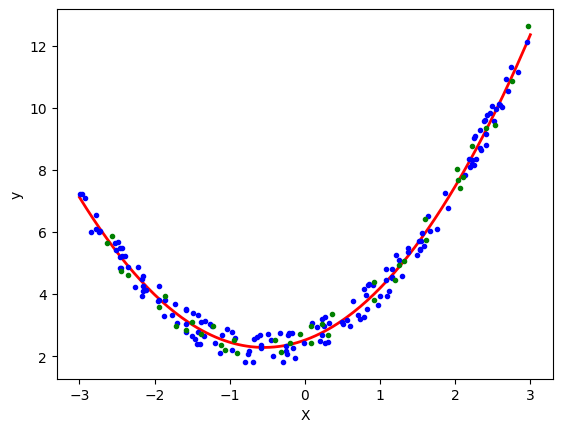

In [ ]:
plt.plot(X_new,y_new,'r-',linewidth = 2,label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training points')
plt.plot(X_test,y_test,'g.',label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.show( )

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

MULTIPLE POLYNOMIAL REGRESSION

In [ ]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()


In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
X_multi_trans.shape

(100, 496)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [37]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

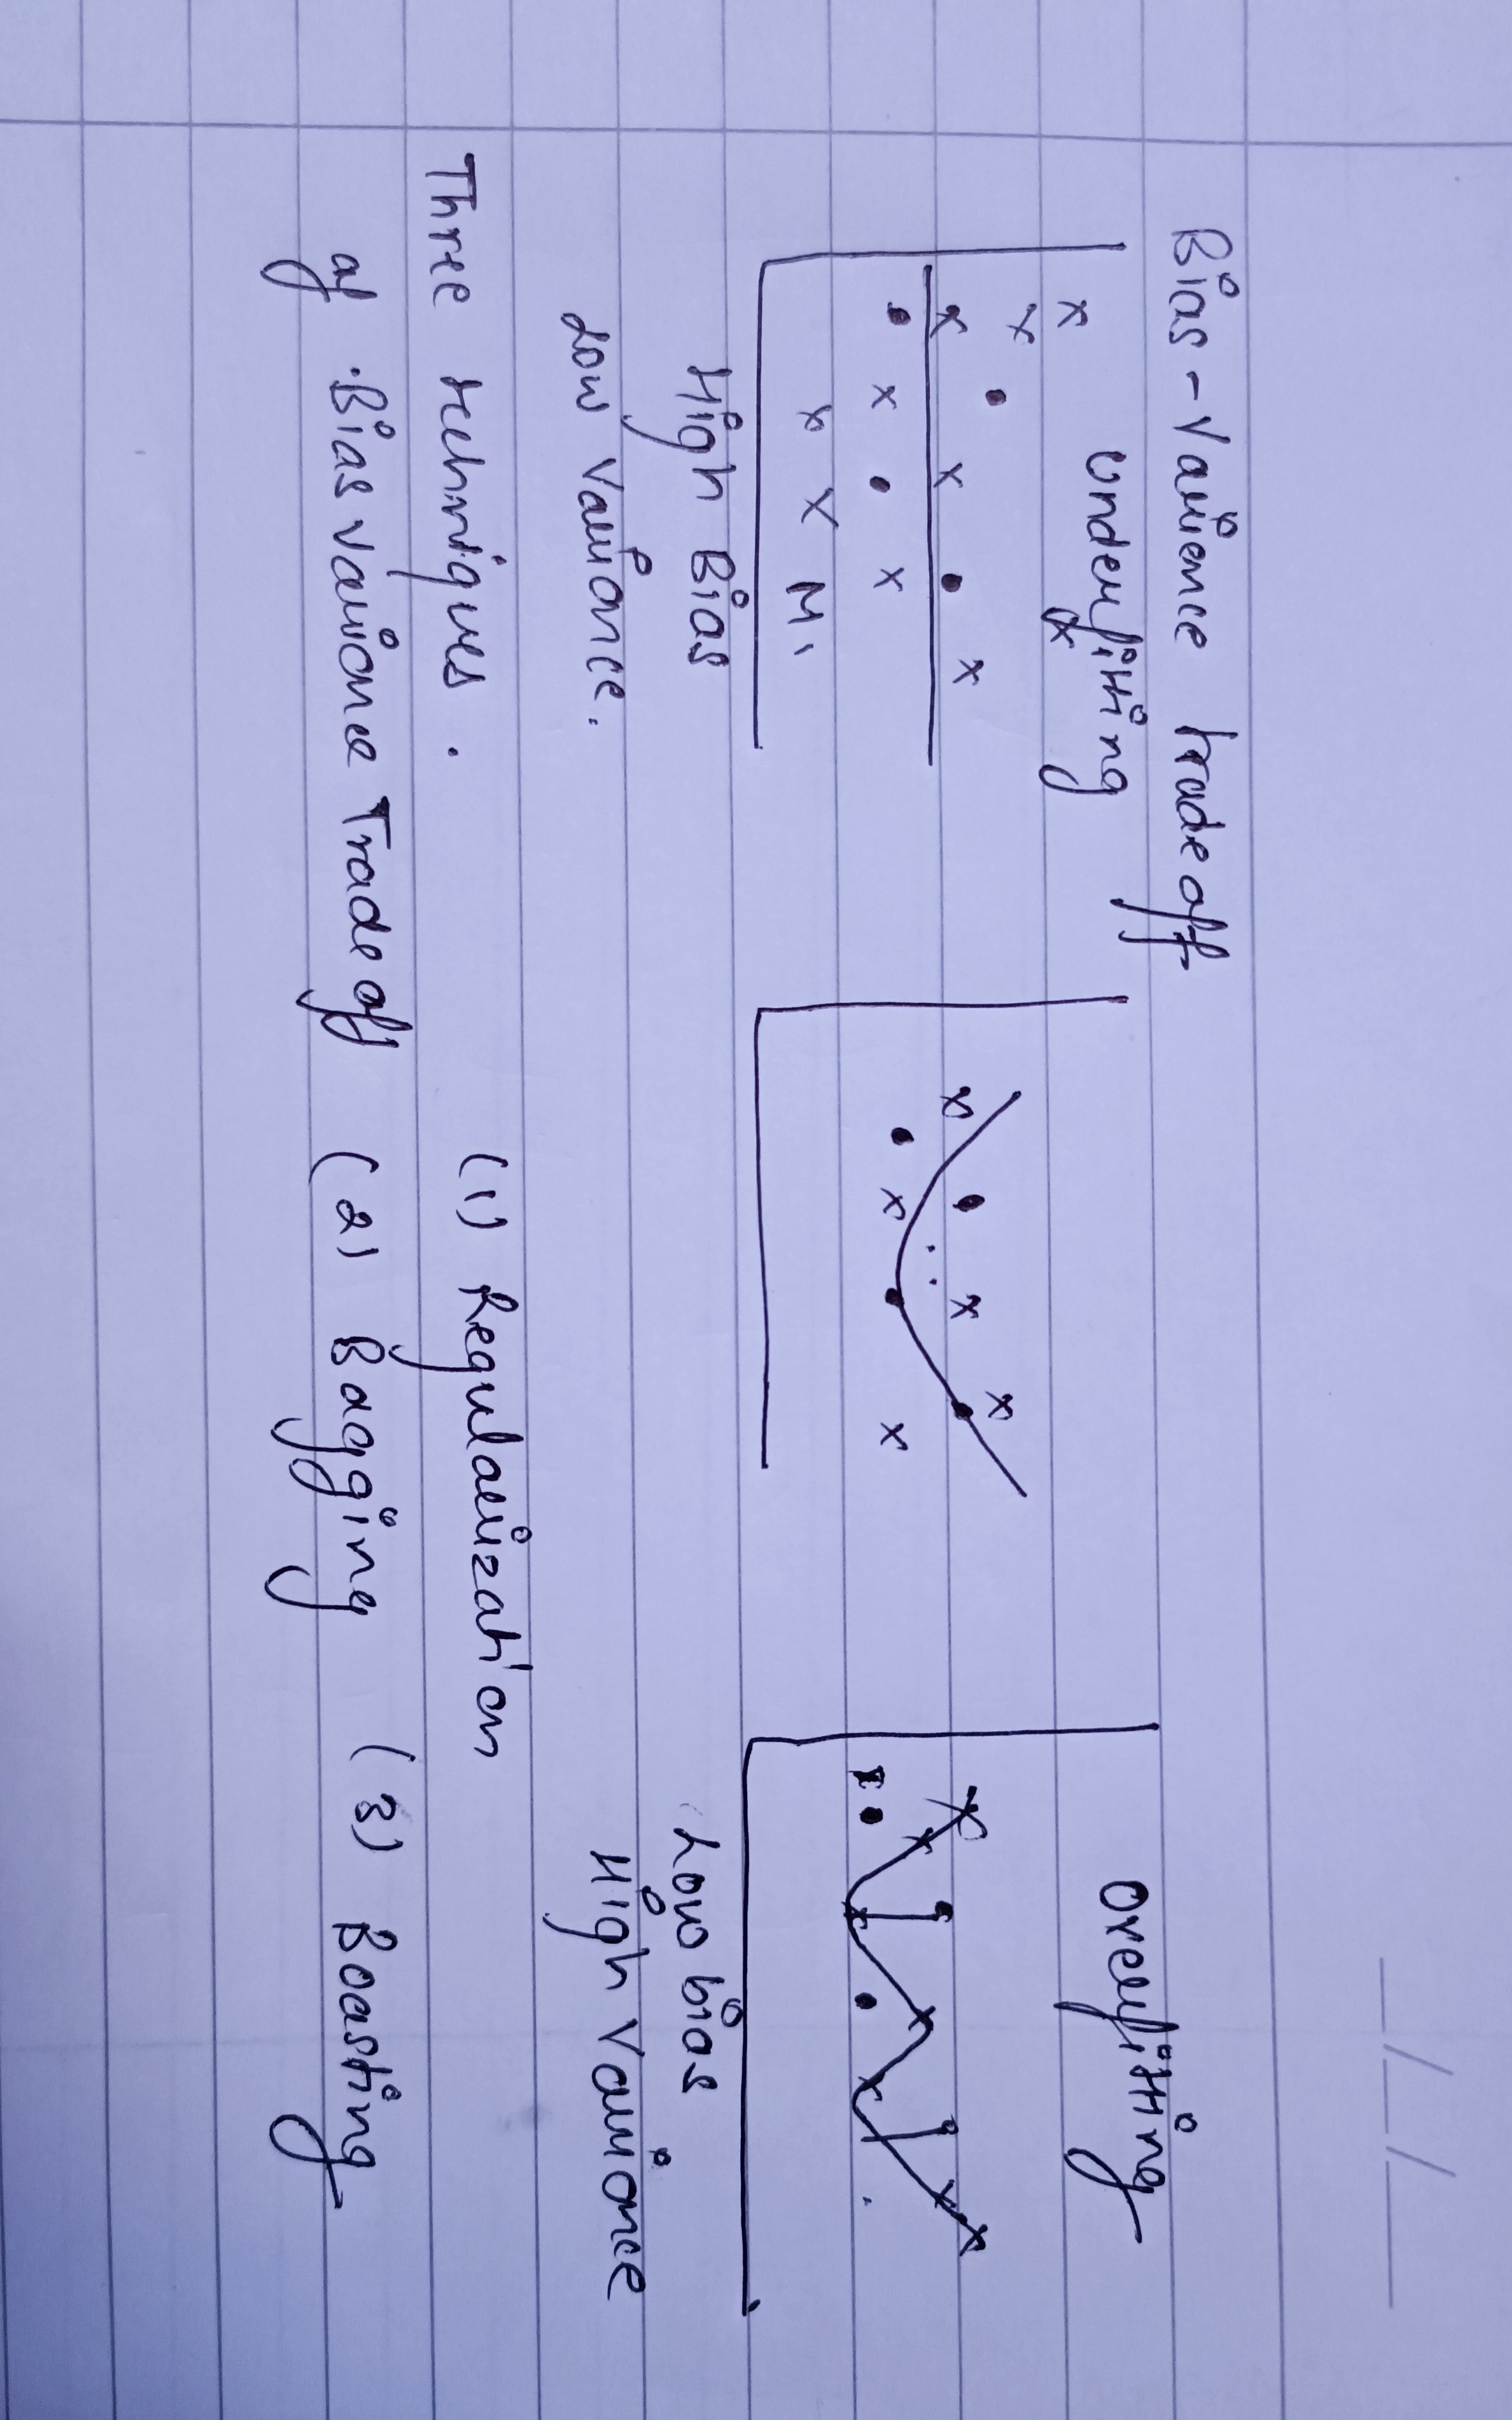